### 9.3. Convolution Neural Network For Image Classification

In [28]:
!pip install --upgrade tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [30]:
import tensorflow as tf
print(tf.__version__)

2.11.0


In [31]:
#importing required libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, MaxPool2D
from tensorflow.keras.models import Model

In [32]:
#importing mnist datase
mnist_data = tf.keras.datasets.fashion_mnist

#dividing data into training and test sets
(training_images, training_labels), (test_images, test_labels) = mnist_data .load_data()


In [33]:
#scaling images
training_images, test_images = training_images/255.0, test_images/255.0

In [34]:
print(training_images.shape)

(60000, 28, 28)


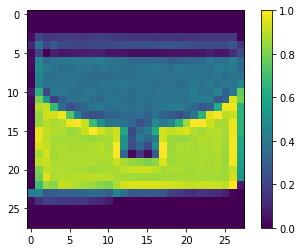

In [35]:
#plotting image number 9 from test set
plt.figure()
plt.imshow(test_images[78])
plt.colorbar()
plt.grid(False)
plt.show()

0: T-shirt\top 

1: Trouser

2: Pullover 

3: Dress 

4: Coat 

5: Sandal 

6: Shirt 

7: Sneaker 

8: Bag 

9: Ankle boot 

In [36]:
#converting data into the right shape
training_images = np.expand_dims(training_images, -1)
test_images = np.expand_dims(test_images, -1)
print(training_images.shape)

(60000, 28, 28, 1)


In [37]:
#printing number of output classes
output_classes = len(set(training_labels))
print("Number of output classes is: ", output_classes)

Number of output classes is:  10


In [38]:
training_images[0].shape

(28, 28, 1)

In [39]:
#Developing the CNN model

input_layer = Input(shape = training_images[0].shape )
conv1 = Conv2D(32, (3,3), strides = 2, activation= 'relu')(input_layer)
maxpool1 = MaxPool2D(2, 2)(conv1)
conv2 = Conv2D(64, (3,3), strides = 2, activation= 'relu')(maxpool1)
#conv3 = Conv2D(128, (3,3), strides = 2, activation= 'relu')(conv2)
flat1 = Flatten()(conv2)
drop1 = Dropout(0.2)(flat1)
dense1 = Dense(512, activation = 'relu')(drop1)
drop2  = Dropout(0.2)(dense1)
output_layer = Dense(output_classes, activation= 'softmax')(drop2)

model = Model(input_layer, output_layer)

In [40]:
#compiling the CNN model
model.compile(optimizer = 'adam', loss= 'sparse_categorical_crossentropy', metrics =['accuracy'])


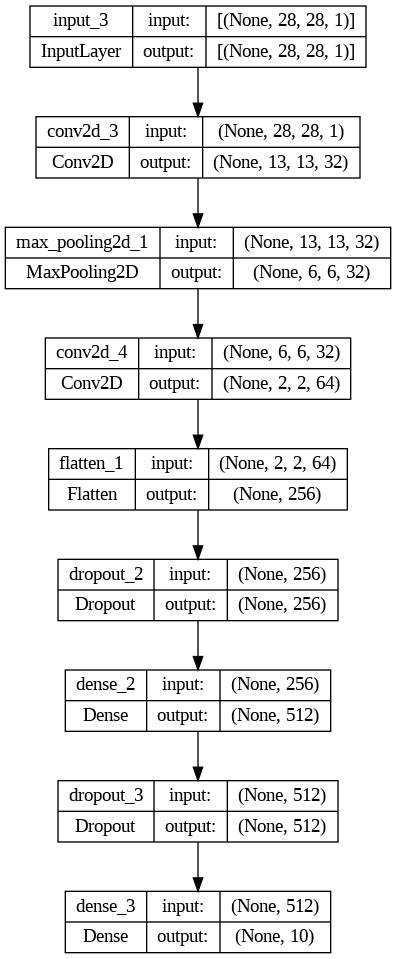

In [41]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot1.png', show_shapes=True, show_layer_names=True)

In [42]:
#training the CNN model
model_history = model.fit(training_images, training_labels, epochs=20, validation_data=(test_images, test_labels), verbose=1)

Epoch 1/20
1875/1875 [==============================] - 13s 5ms/step - loss: 0.6081 - accuracy: 0.7761 - val_loss: 0.4863 - val_accuracy: 0.8207
Epoch 2/20
1875/1875 [==============================] - 8s 5ms/step - loss: 0.4308 - accuracy: 0.8410 - val_loss: 0.4180 - val_accuracy: 0.8413
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3878 - accuracy: 0.8568 - val_loss: 0.3678 - val_accuracy: 0.8610
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3601 - accuracy: 0.8666 - val_loss: 0.3559 - val_accuracy: 0.8698
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3419 - accuracy: 0.8711 - val_loss: 0.3441 - val_accuracy: 0.8761
Epoch 6/20
1875/1875 [==============================] - 8s 5ms/step - loss: 0.3234 - accuracy: 0.8796 - val_loss: 0.3224 - val_accuracy: 0.8808
Epoch 7/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3131 - accuracy: 0.8824 - val_loss: 0.3324 - val_accuracy

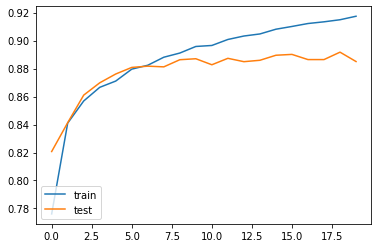

In [46]:
#plotting accuracy
import matplotlib.pyplot as plt

plt.plot(model_history.history['accuracy'], label = 'accuracy')
plt.plot(model_history.history['val_accuracy'], label = 'val_accuracy')
plt.legend(['train','test'], loc='lower left')

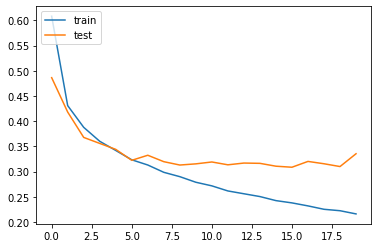

In [47]:
#plotting loss
plt.plot(model_history.history['loss'], label = 'loss')
plt.plot(model_history.history['val_loss'], label = 'val_loss')
plt.legend(['train','test'], loc='upper left')

In [49]:
#making predictions on a single image
output = model.predict(test_images)
prediction = np.argmax(output[12])
print(prediction)

313/313 [==============================] - 1s 2ms/step
7
